Tests the method on a nonlinear pendulum, 

$$
\frac{d^2 \theta}{dt^2} + a \sin \theta = 0
$$

The tests select an initial $d \theta / dt$ from a uniform distribution, an initial $\theta$ from a uniform distribution, and a value of $a$ from a normal distribution. 

In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_nlpendulum
from stochastic_tests import Test

t_fin = 10.0
num_steps = 1000
test_kwargs = dict(t_fin=t_fin, 
                   num_steps=num_steps, 
                   sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)], 
                   trials=[10, 100, 1000, 10000],
                   stochastic=False)

def do_test(_test):
    _test.execute_deterministic()
    _test.plot_results_deterministic()

    label, out = ipw.Label(), ipw.Output()
    display(out)
    with out:
        display(label)
    _test.execute_stochastic(label)
    out.clear_output()
    _test.plot_results_stochastic()
    _test.plot_stats()
    _test.plot_distributions()
    _test.find_ecfs()
    _test.measure_ecf_diffs()
    _test.test_sampling(err_thresh=1E-3)
    preview_time = _test.max_ks_stat_time(_test.trials[-1])
    # preview_time = _test.min_final_eval_time(_test.trials[-1])
    _test.plot_ecf(time=preview_time)
    _test.plot_ecf_diffs()
    _test.plot_ecf_comparison(time=preview_time)
    _test.plot_ecf(time=5.0)
    _test.plot_ecf_diffs()
    _test.plot_ecf_comparison(time=5.0)
    _test.plot_ks_sampling()

    for t in _test.trials:
        ecf_ks_stat_t = {n: -1 for n in _test.model.results_names}
        for ks in _test.ecf_ks_stat[t]:
            for n, ks_stat in ks.items():
                ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
        print(f'{t} trials')
        for n, ks_stat in ecf_ks_stat_t.items():
            print(f'\t{n}: {ks_stat}')

def do_fits(_test):
    _test.generate_ecf_diff_fits()
    _, axs = _test.plot_ecf_diff_fits(_test.plot_ecf_diffs())
    _ = axs[0].legend()

    _test.generate_ecf_sampling_fits()
    _, ax = _test.plot_ecf_sampling_fits(_test.plot_ecf_sampling())
    _ = ax.legend()

start_pool()

[947447,
 947448,
 947449,
 947448,
 947448,
 947448,
 947453,
 947451,
 947455,
 947456,
 947457,
 947455,
 947455,
 947458,
 947461,
 947462,
 947463,
 947461,
 947461,
 947464]

Test 1: initial $d \theta / dt$ from a uniform distribution.

Output()

10 trials
	t: 1.7726996614465946
	v: 1.7063084827366748
100 trials
	t: 0.6808120948811572
	v: 0.6232238059645046
1000 trials
	t: 0.18282540325248303
	v: 0.19698782000008416
10000 trials
	t: 0.06377521692556869
	v: 0.05265455452744209


/home/timothy.sego/PycharmProjects/ssr_project_2024/code/stochastic_repro.py:994: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)


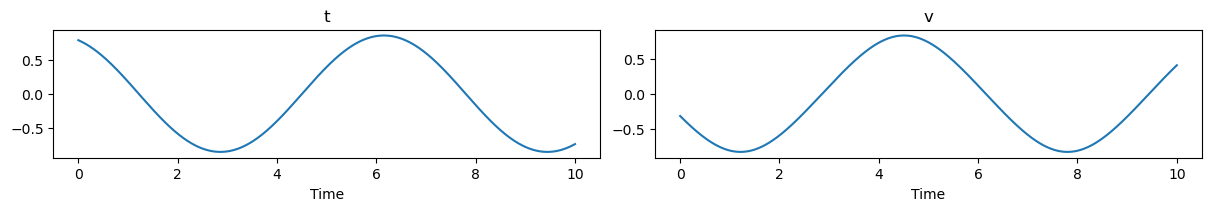

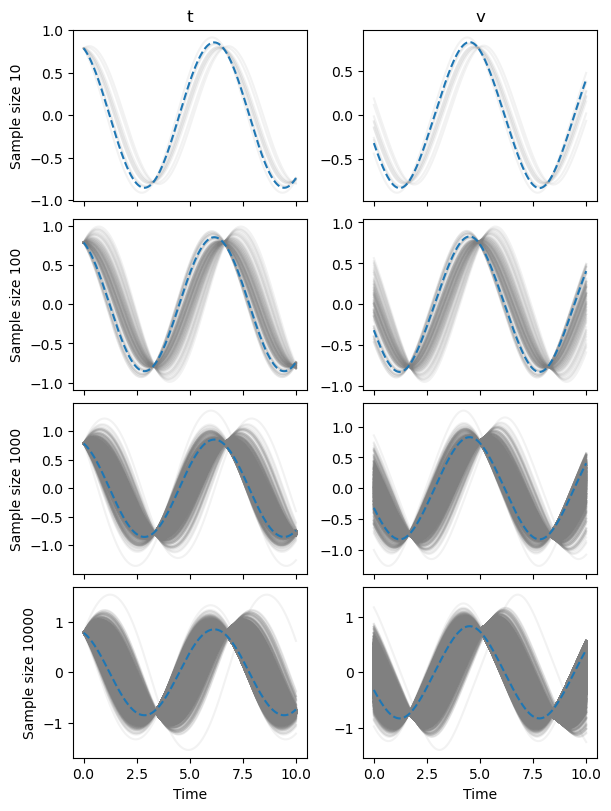

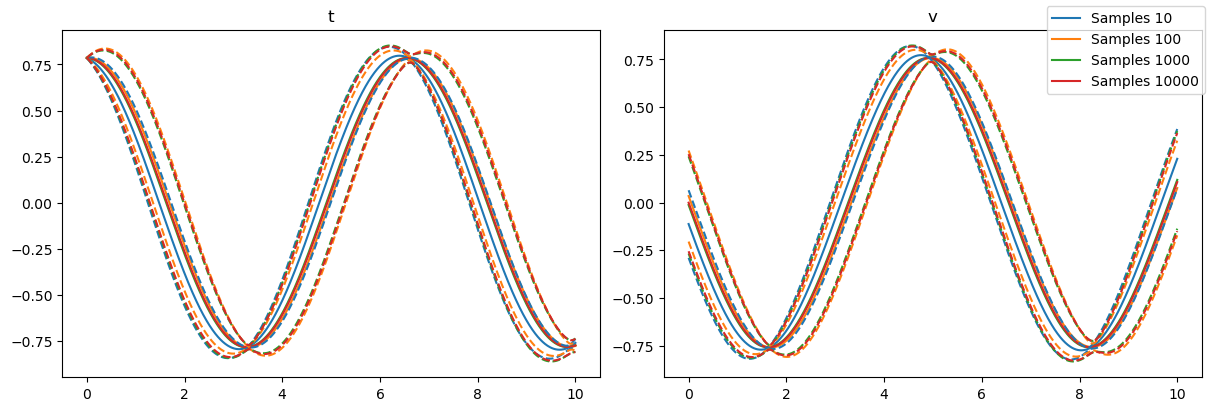

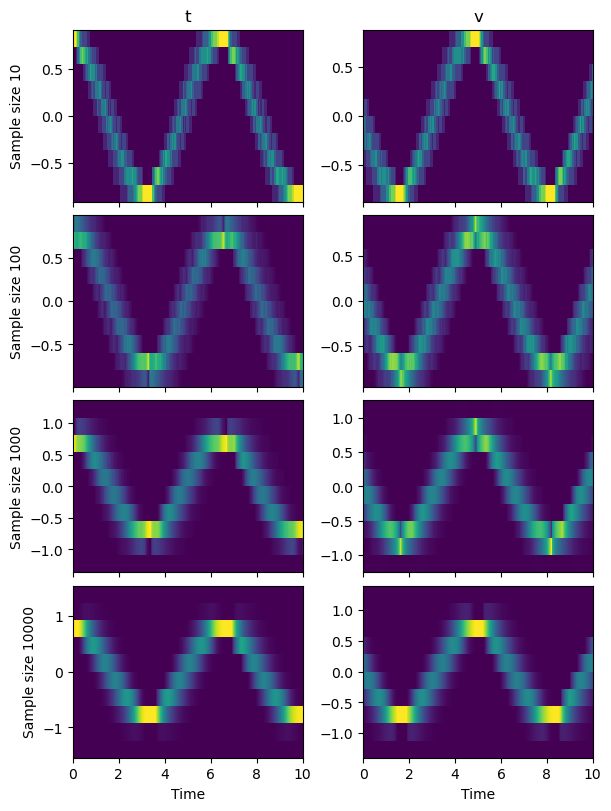

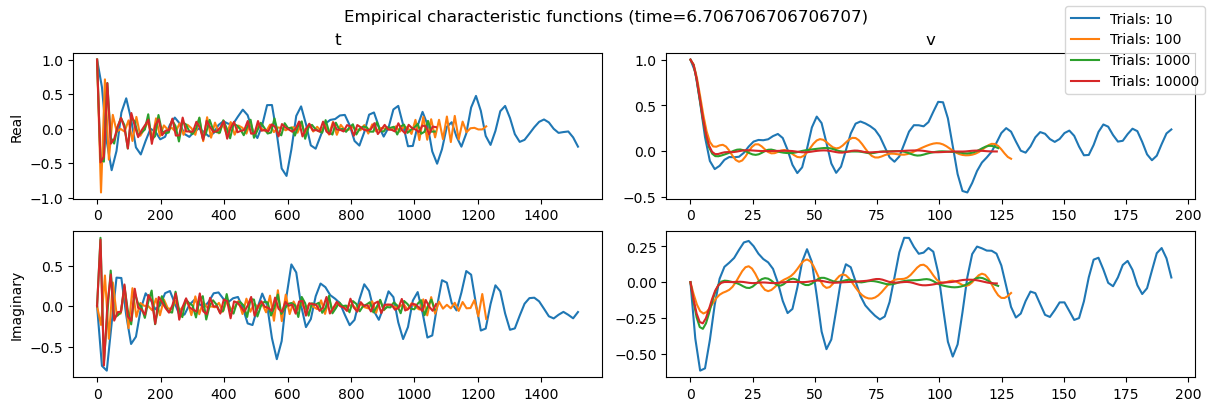

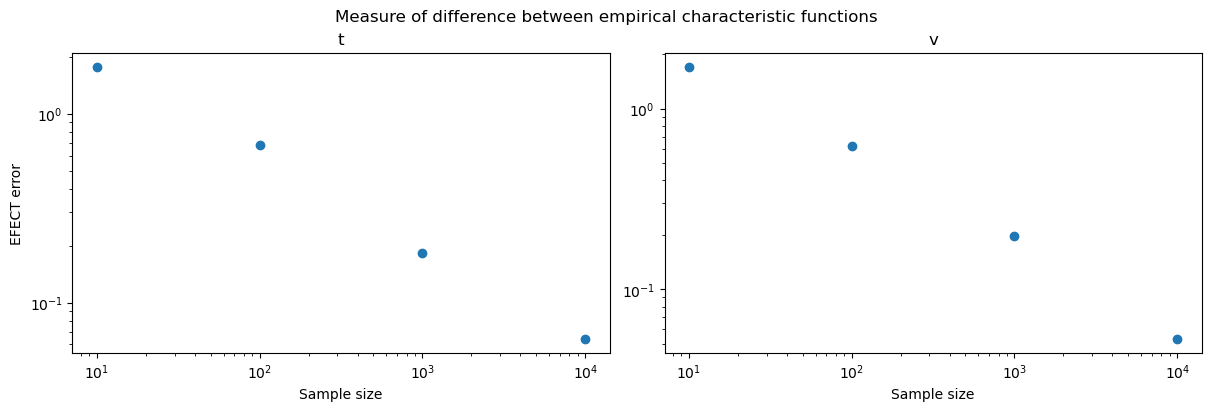

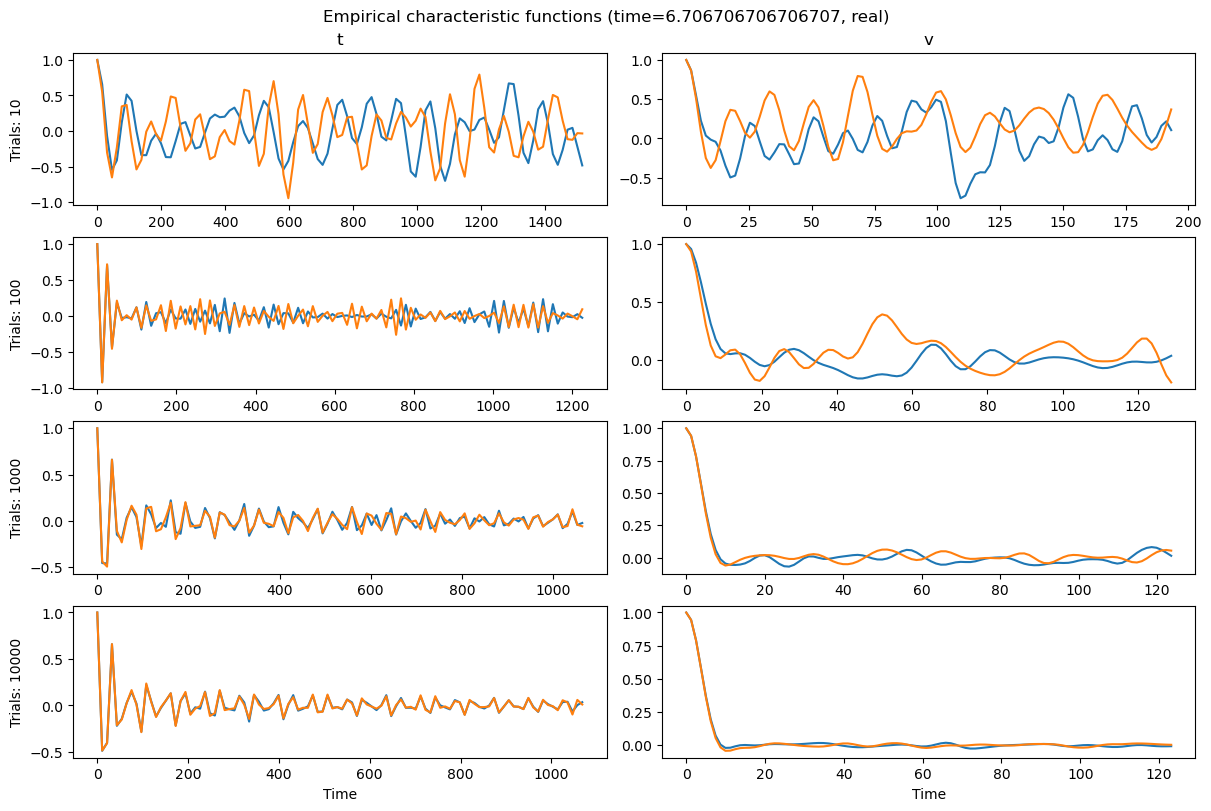

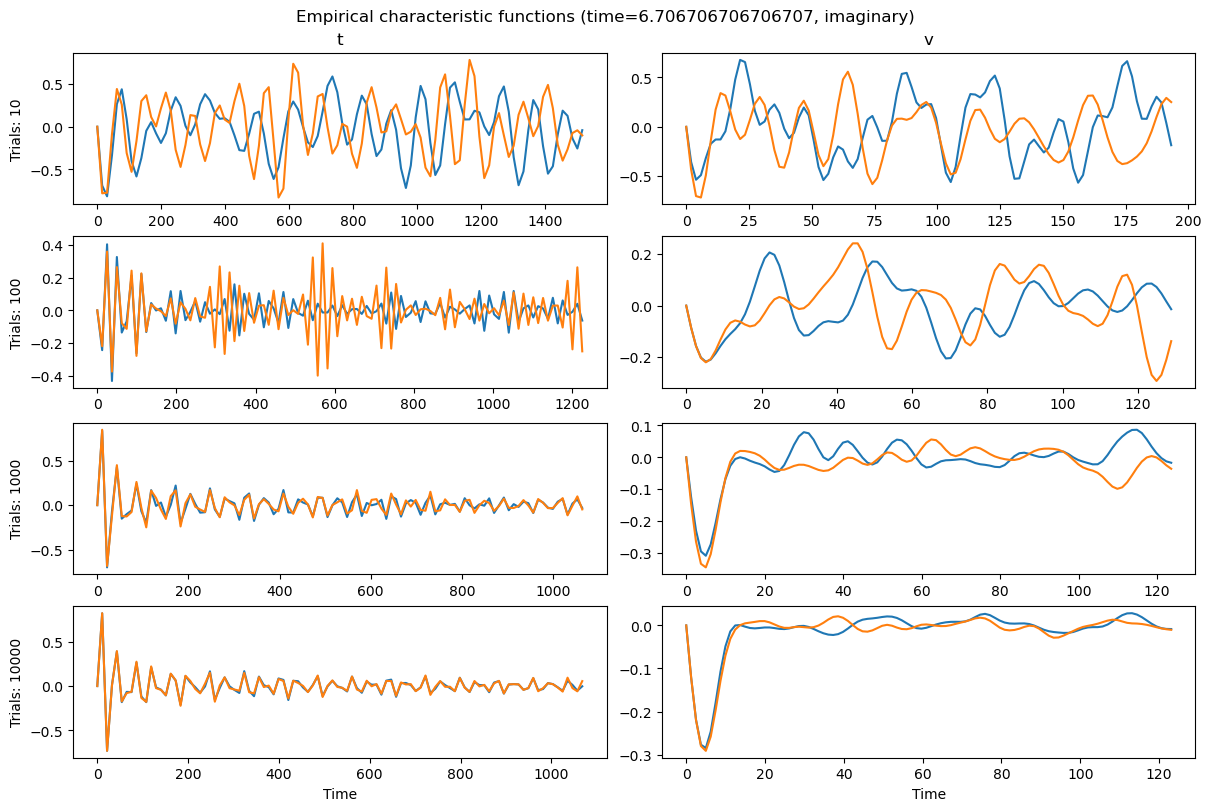

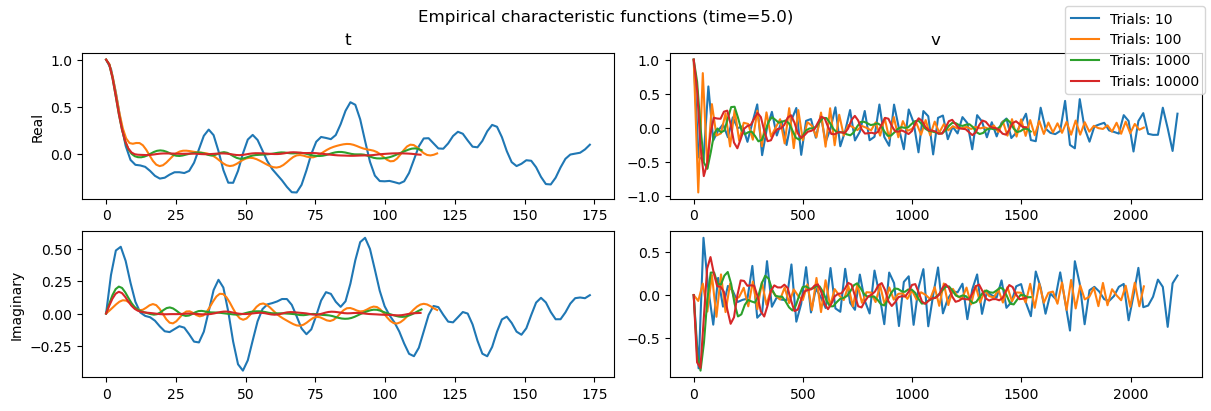

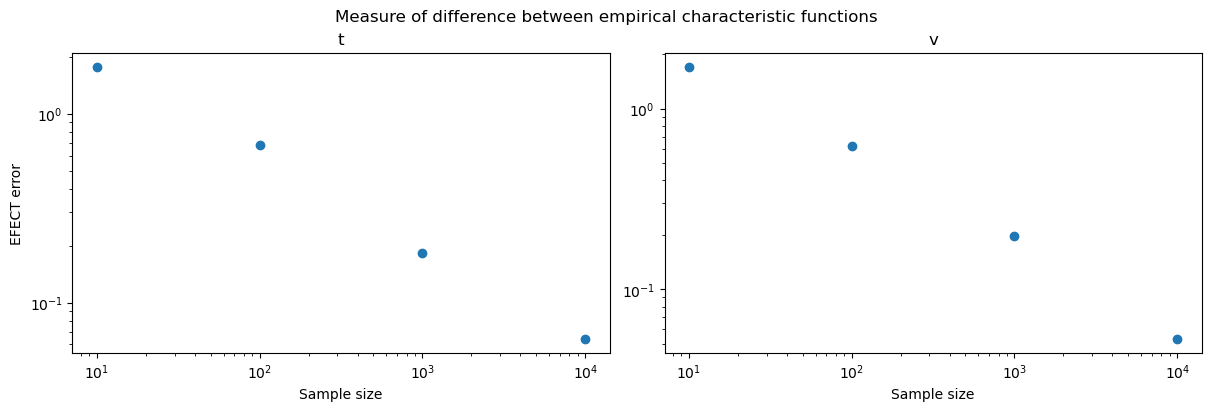

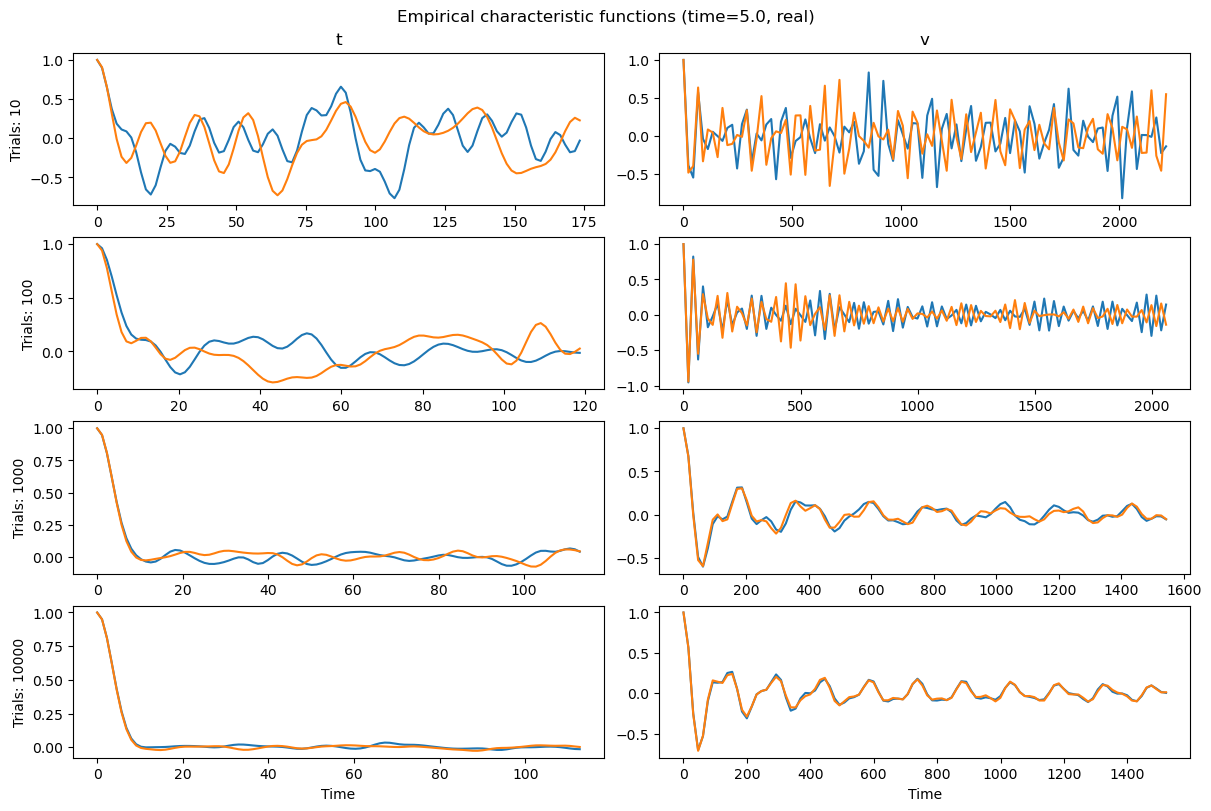

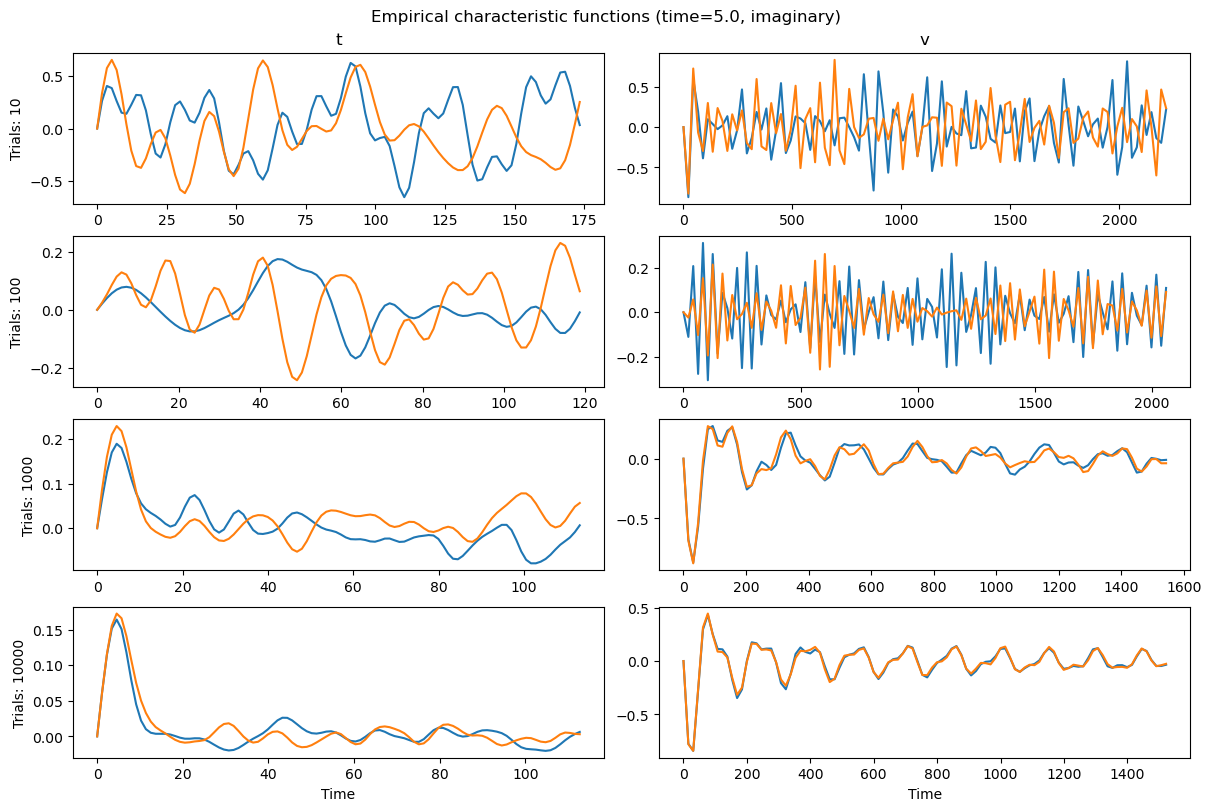

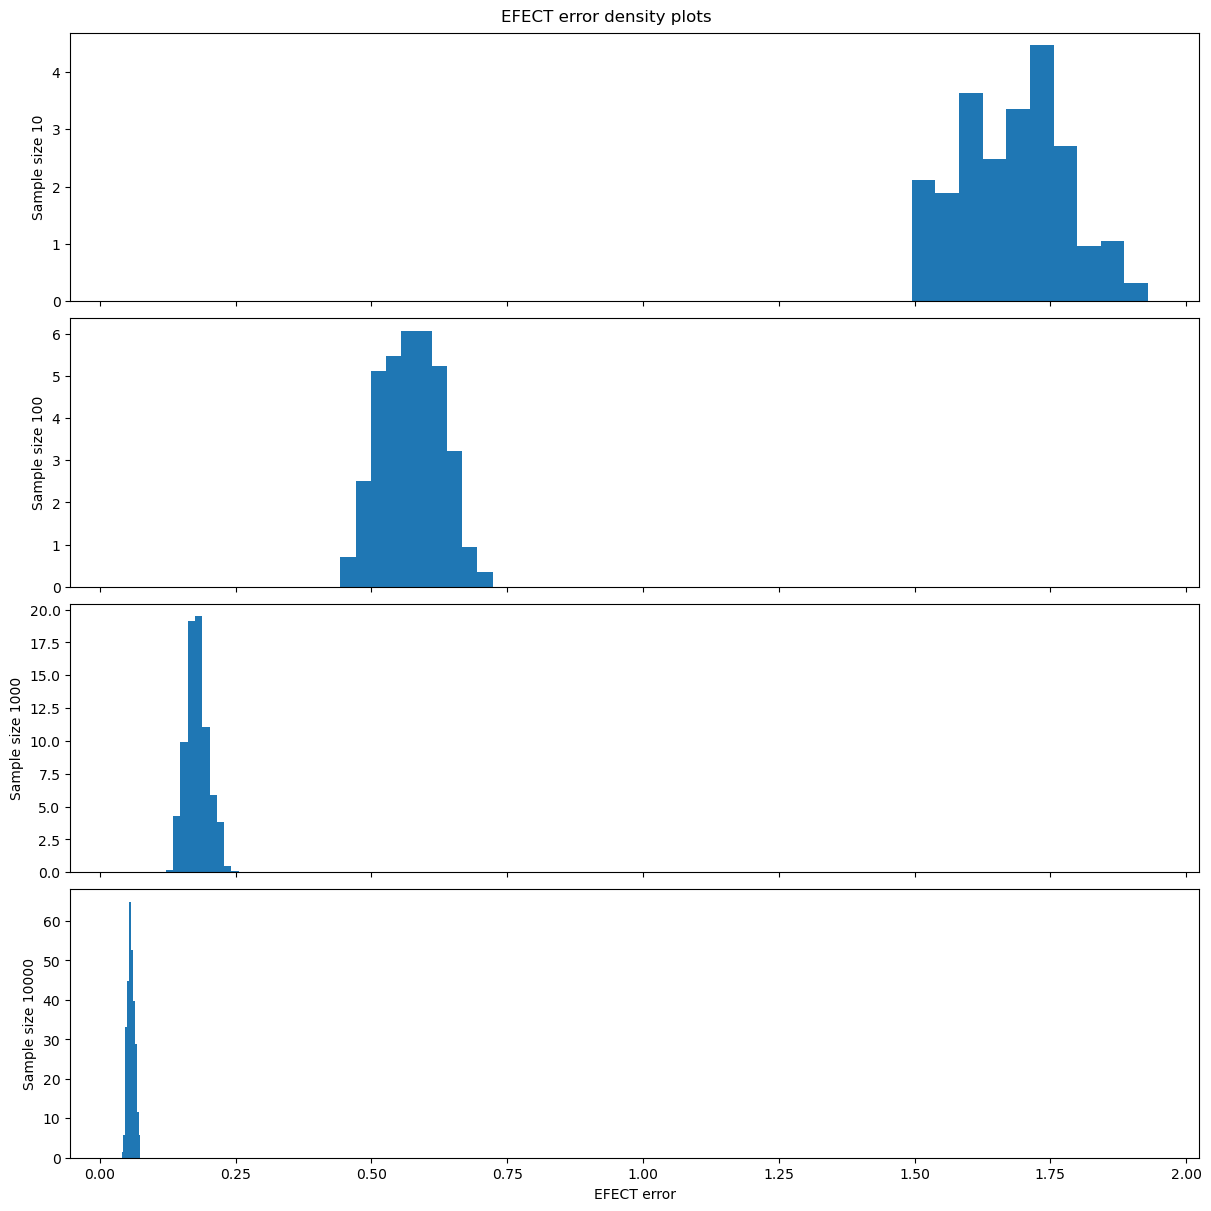

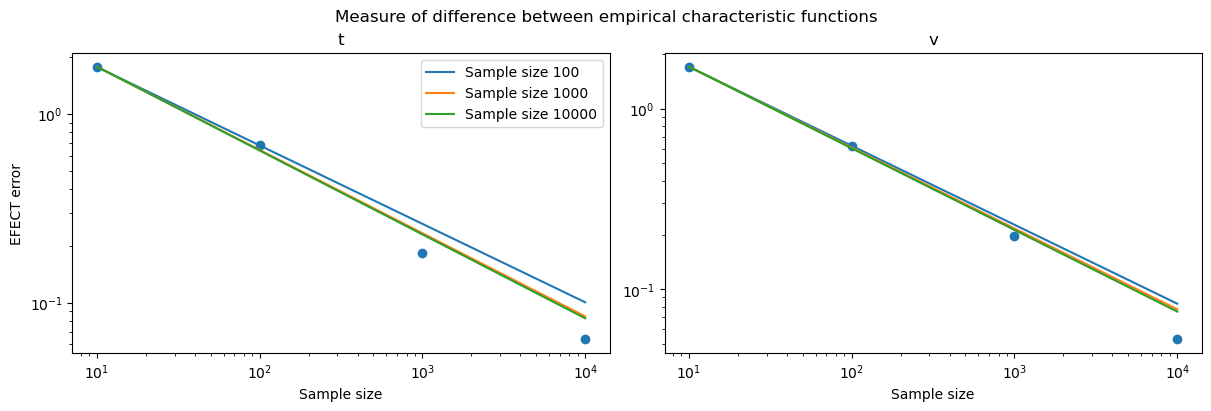

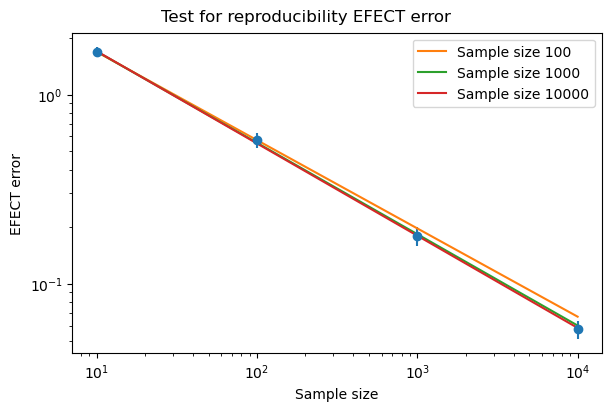

In [2]:
# Runtime: ~55 minutes (M1 max)
test = Test(model=model_nlpendulum({'v': ('norm', (0.0, 0.25))}), **test_kwargs)
do_test(test)
do_fits(test)

Test 2: initial $\theta$ from a uniform distribution. 

Output()

10 trials
	t: 1.7262430724005315
	v: 1.7549156826629164
100 trials
	t: 0.5286966242809243
	v: 0.5864456939120705
1000 trials
	t: 0.18781853749474486
	v: 0.1869870581581862
10000 trials
	t: 0.06006420839901367
	v: 0.05908418610565314


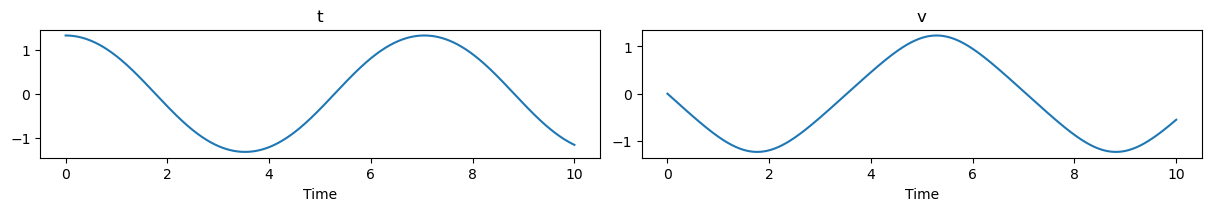

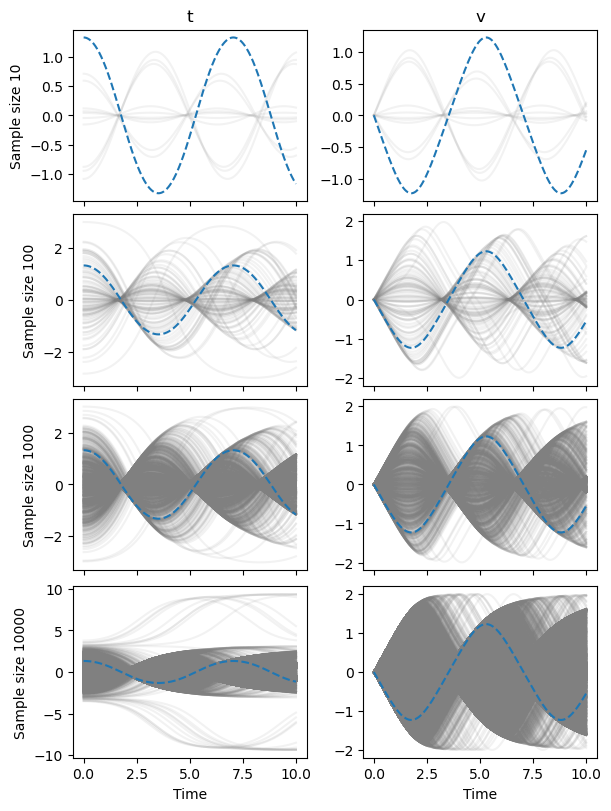

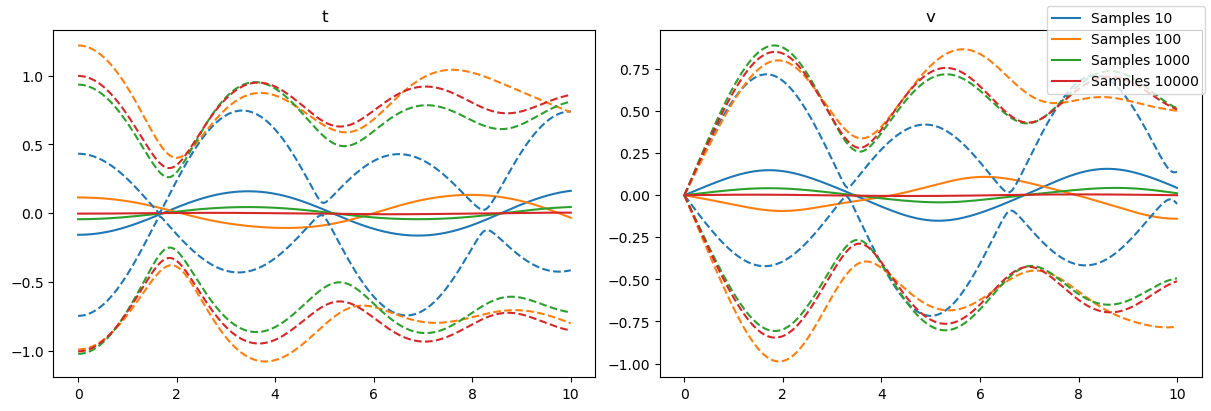

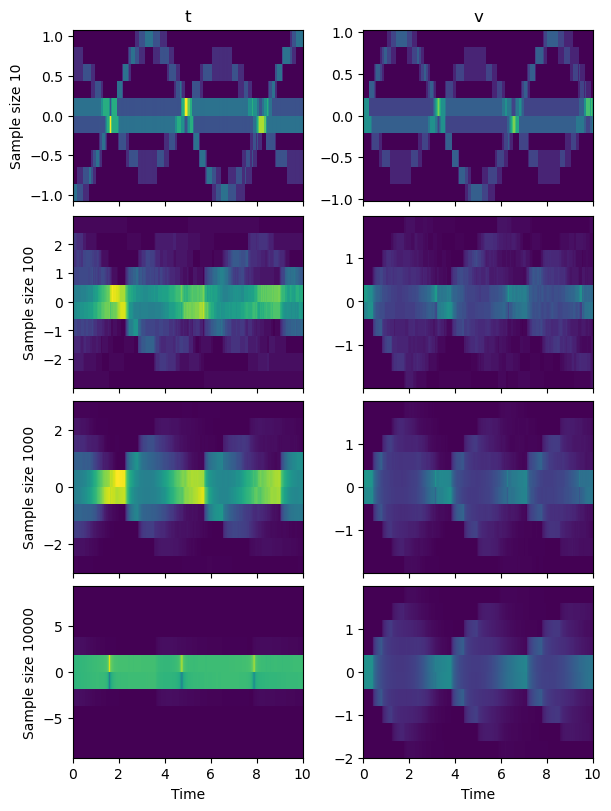

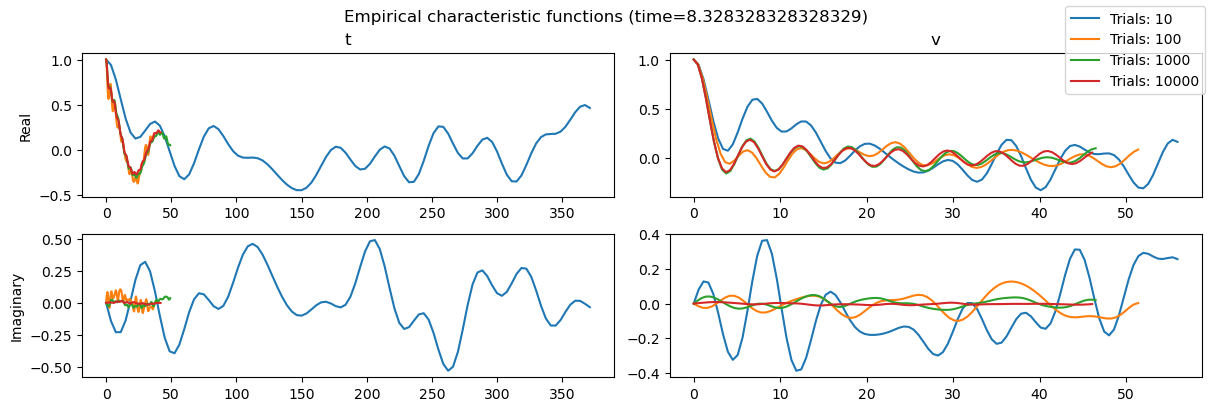

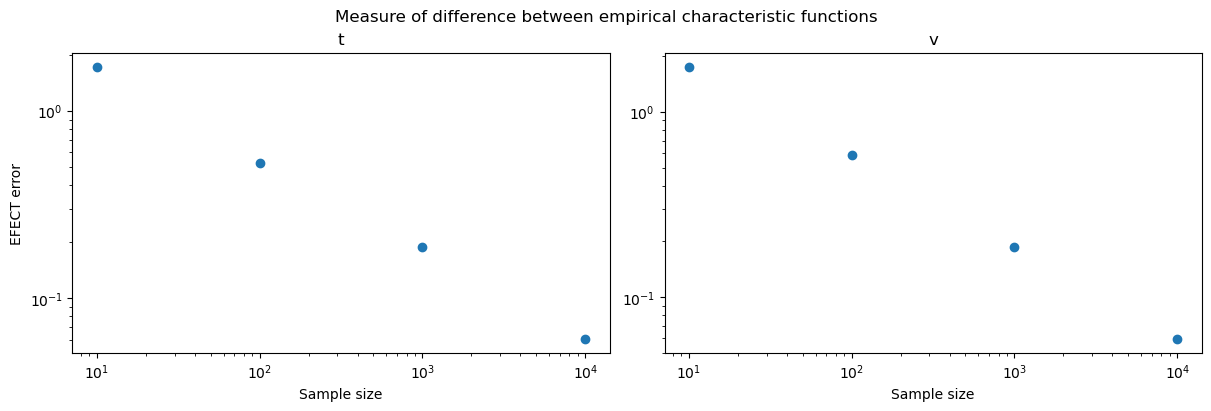

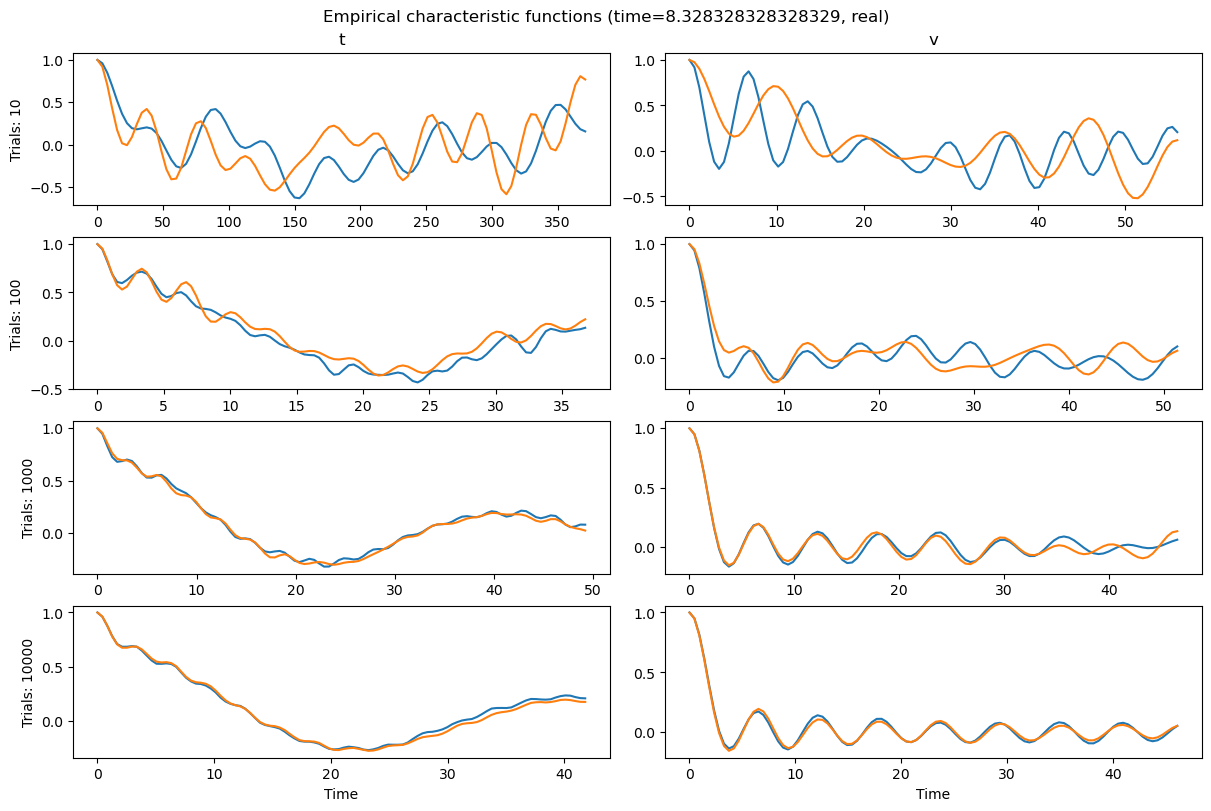

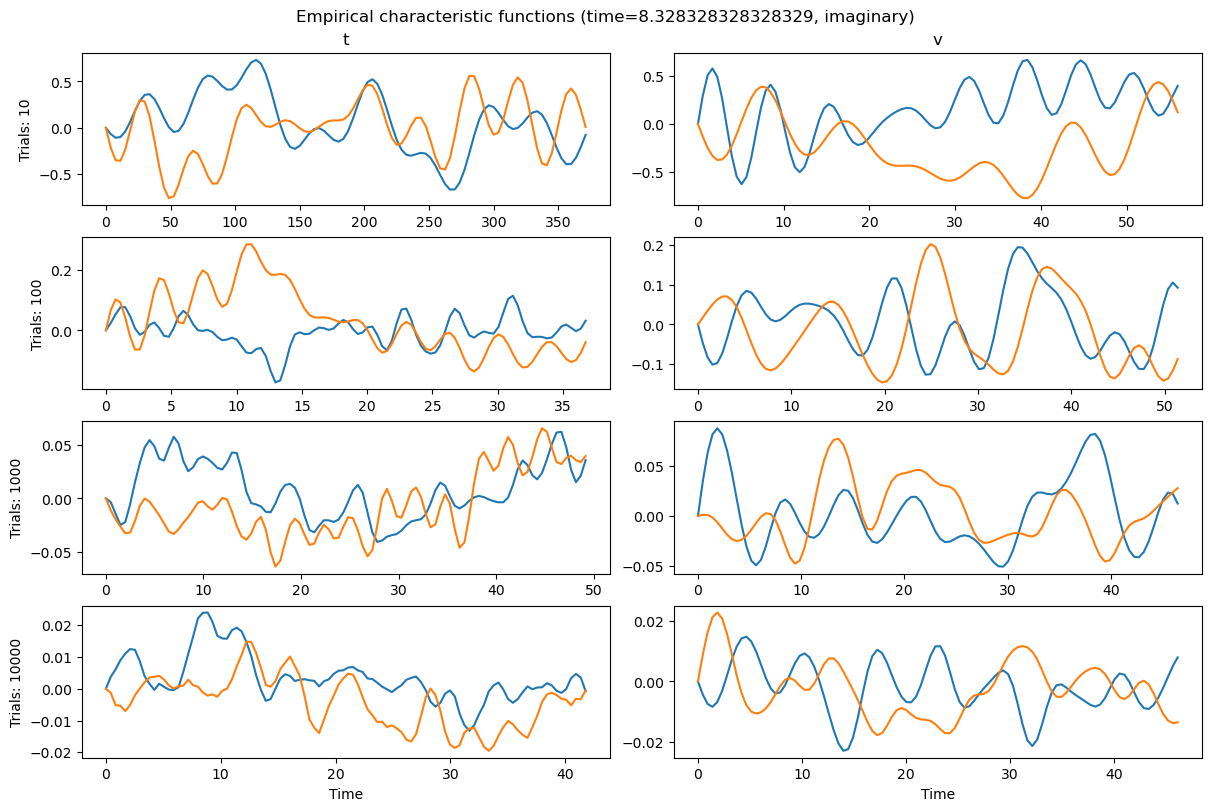

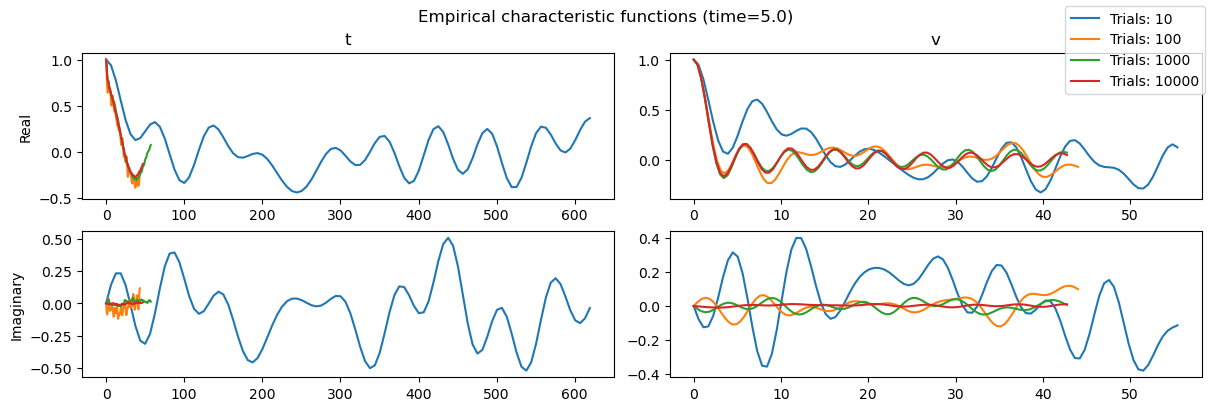

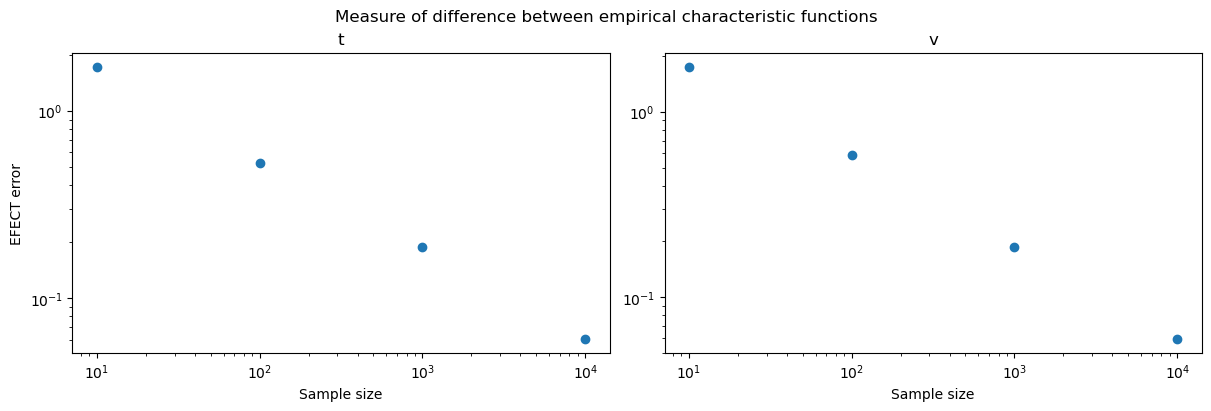

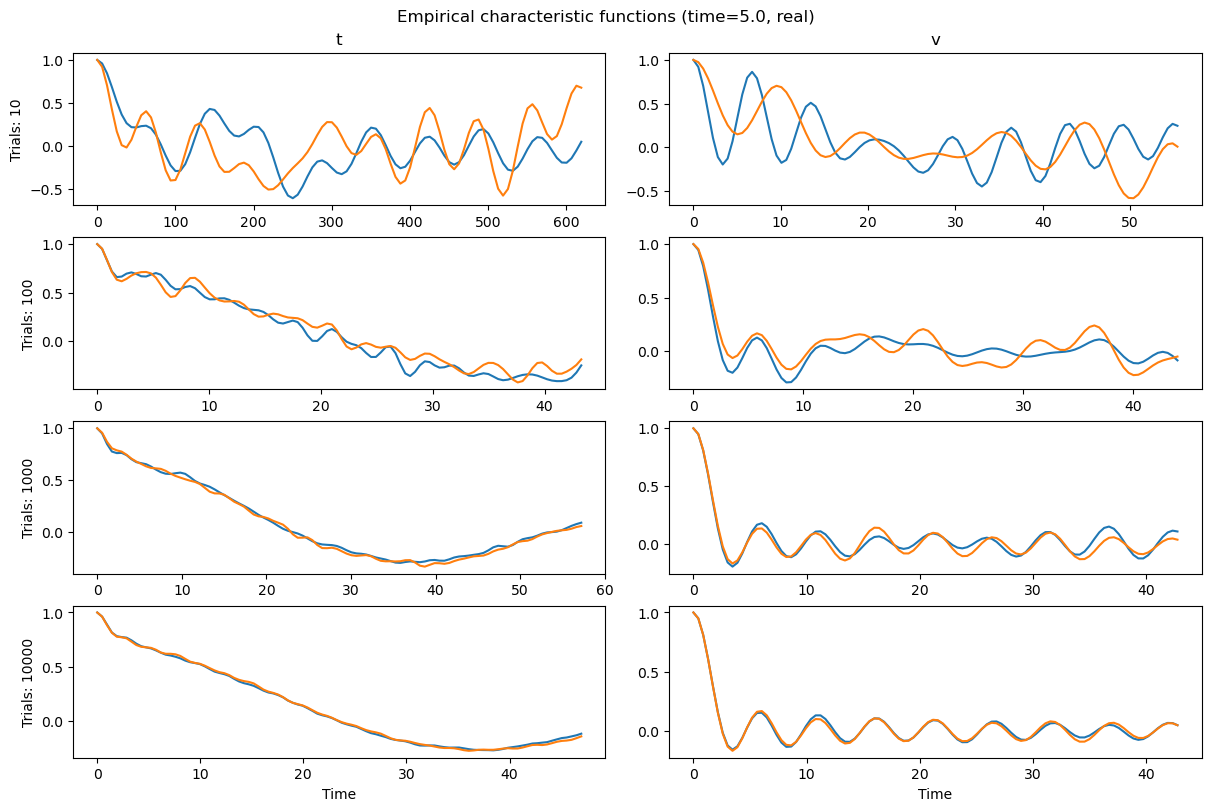

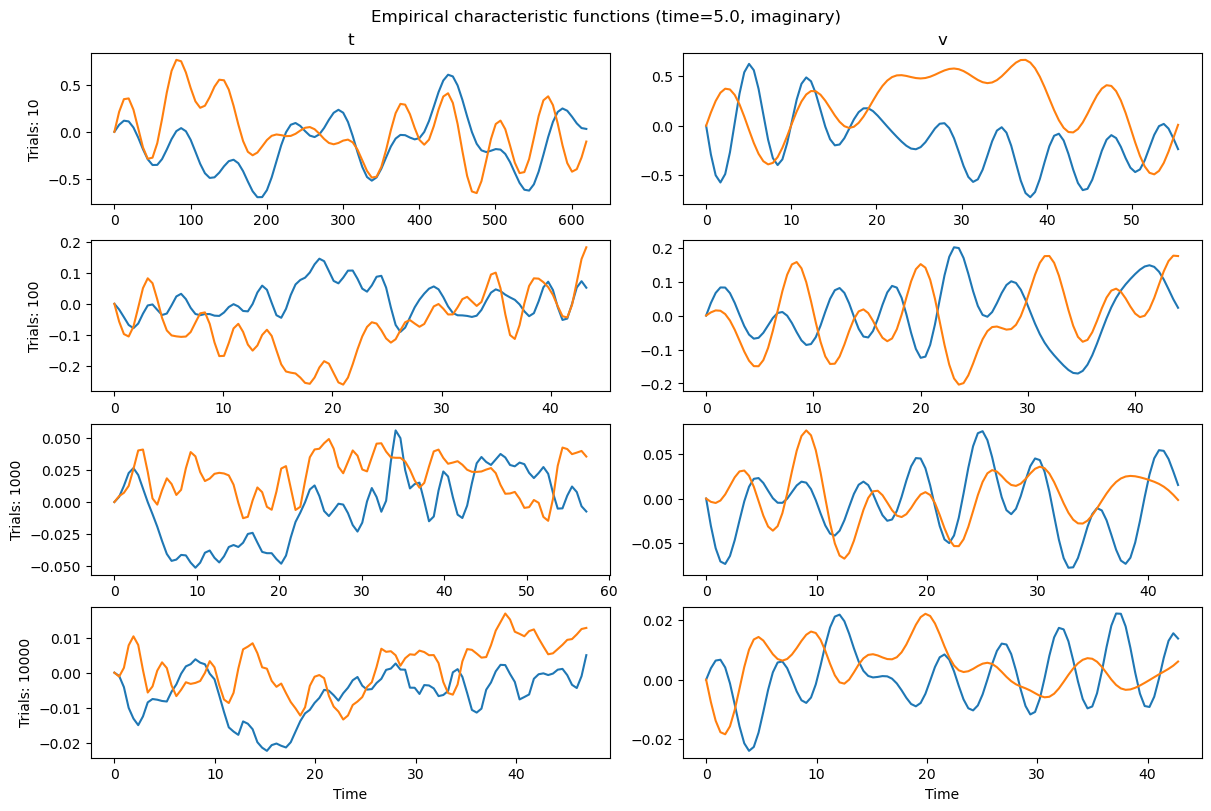

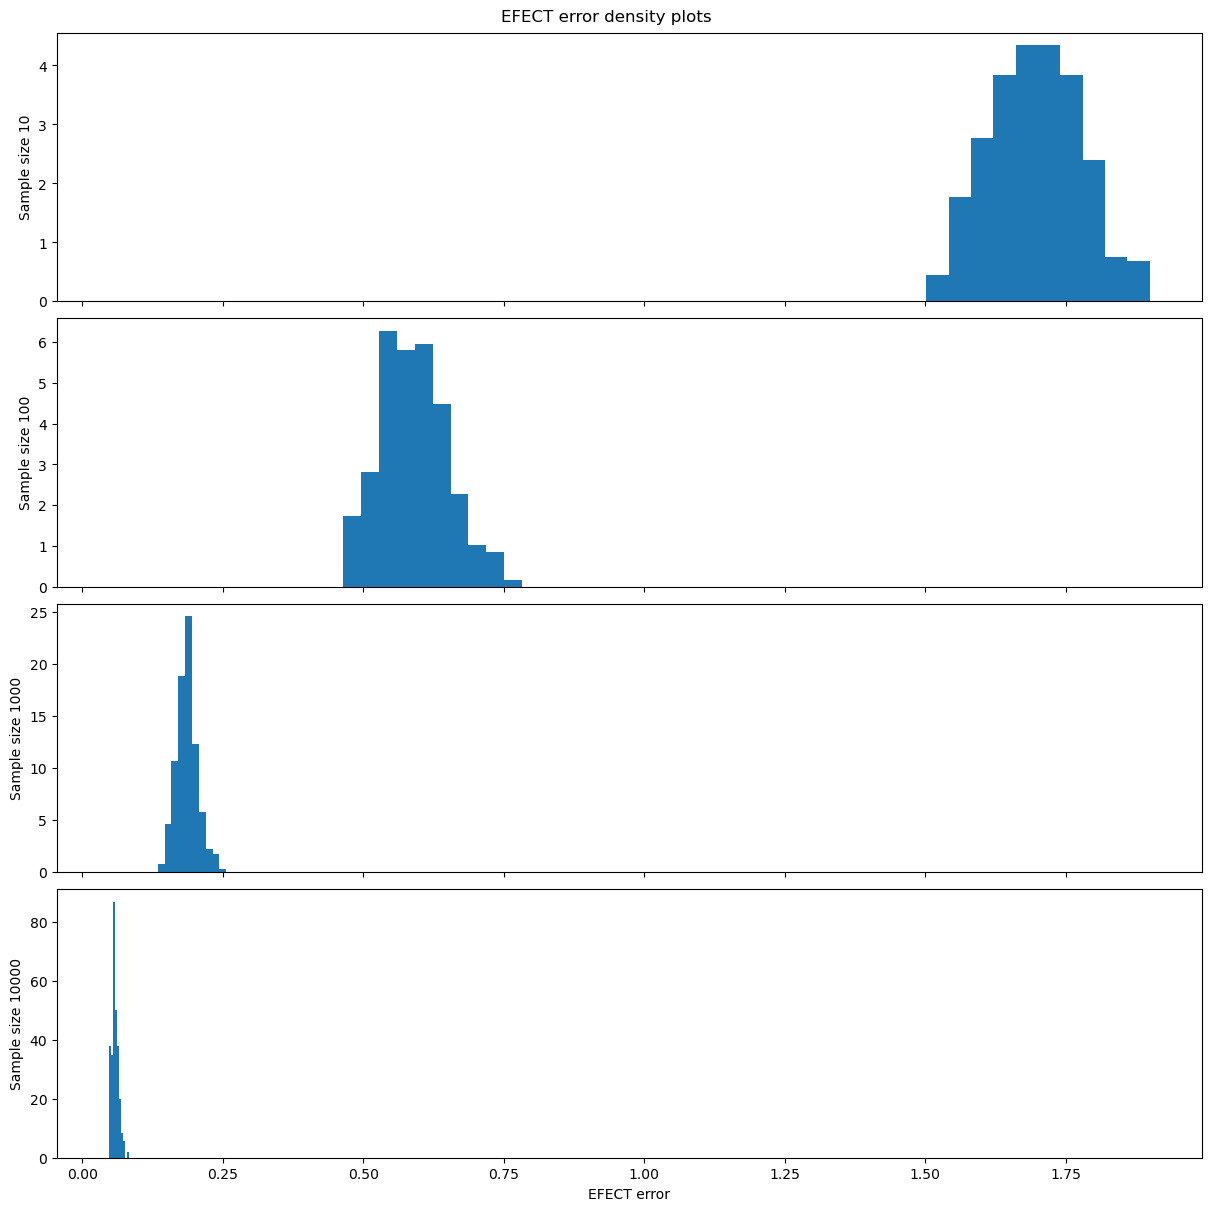

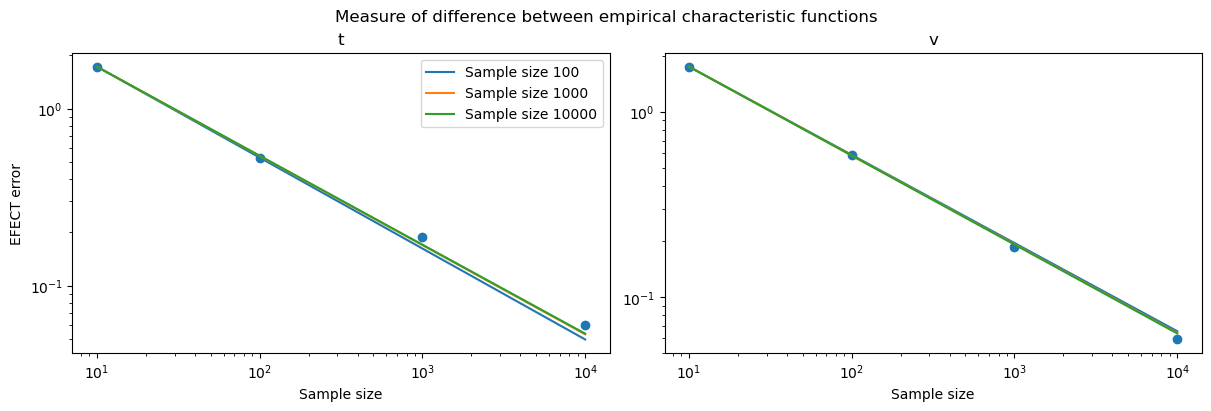

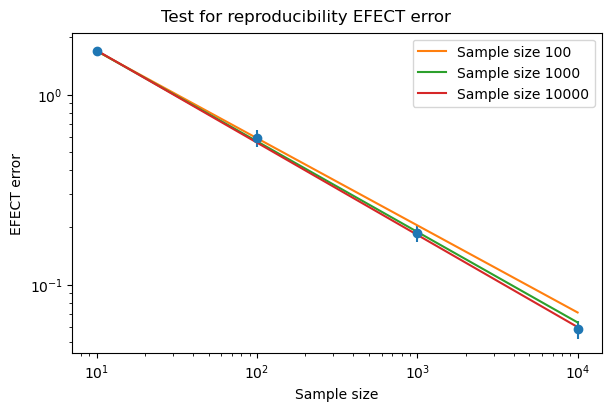

In [3]:
# Runtime: ~29 minutes (M1 max)
test = Test(model=model_nlpendulum({'t': ('norm', (0.0, 1.0))}), **test_kwargs)
do_test(test)
do_fits(test)

Test 3: value of $a$ from a normal distribution. 

Output()

10 trials
	t: 1.8289365783591933
	v: 1.8093422046750383
100 trials
	t: 0.6588671986399853
	v: 0.5918904718397522
1000 trials
	t: 0.18735026048171588
	v: 0.2026884719714592
10000 trials
	t: 0.06380203460074775
	v: 0.06065263290925947


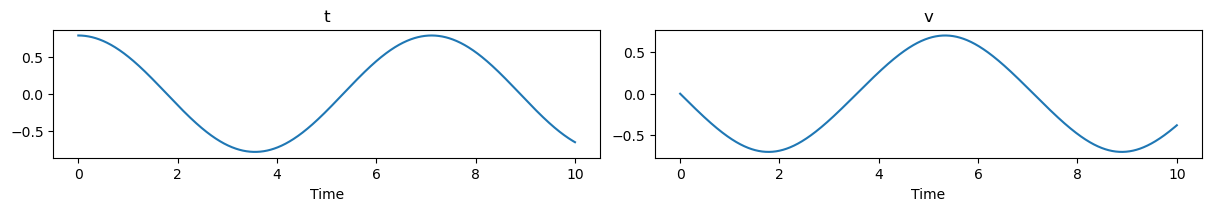

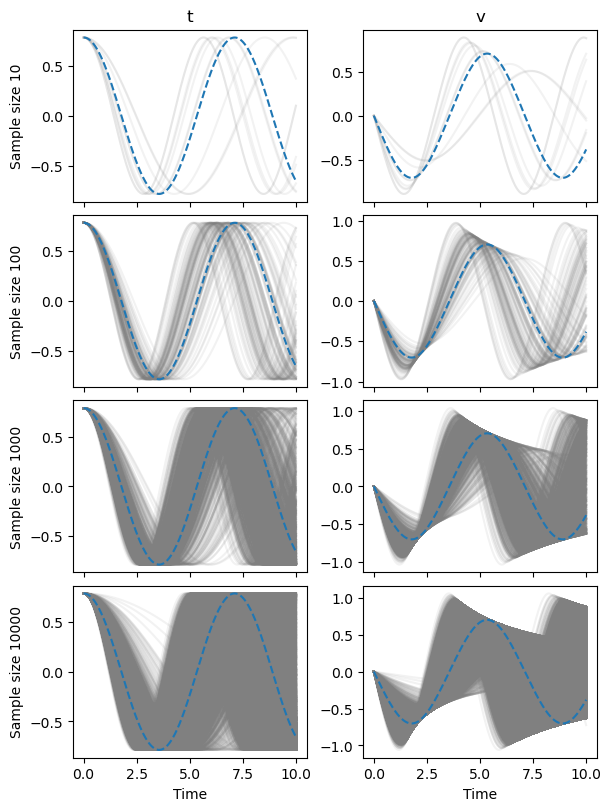

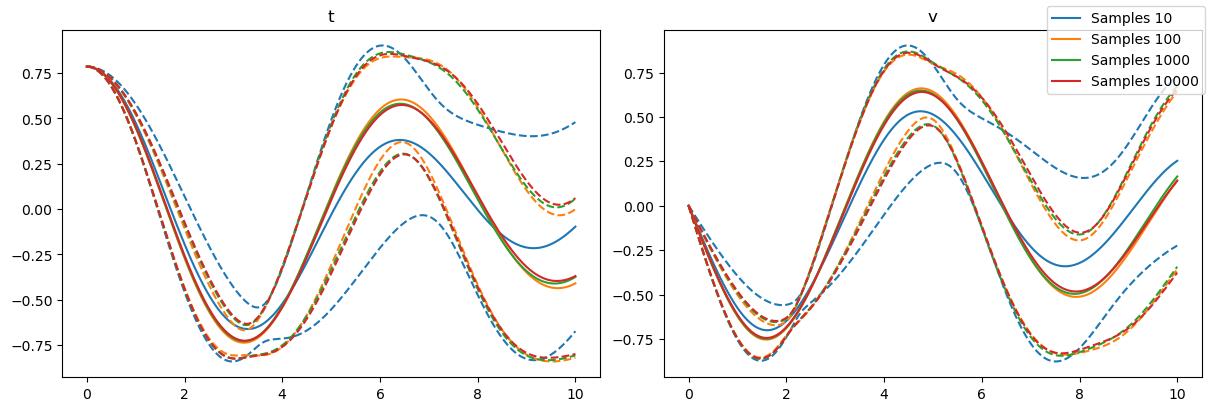

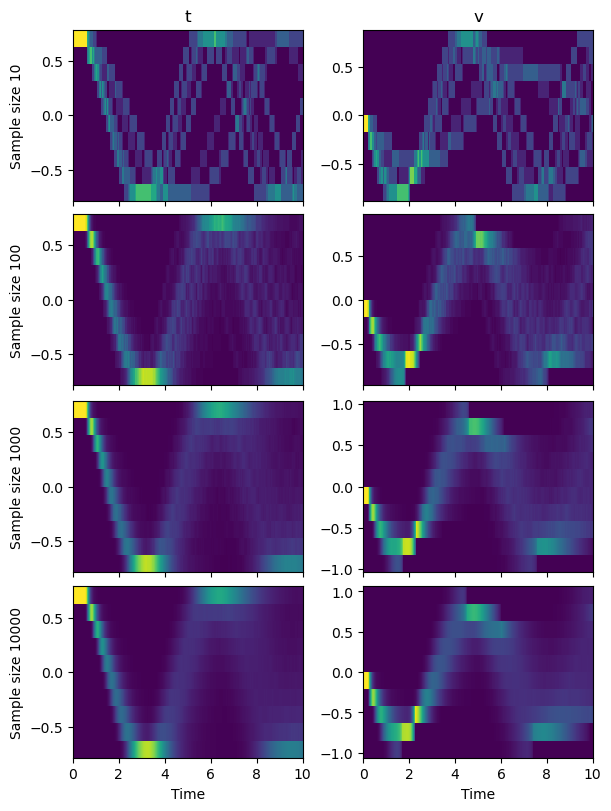

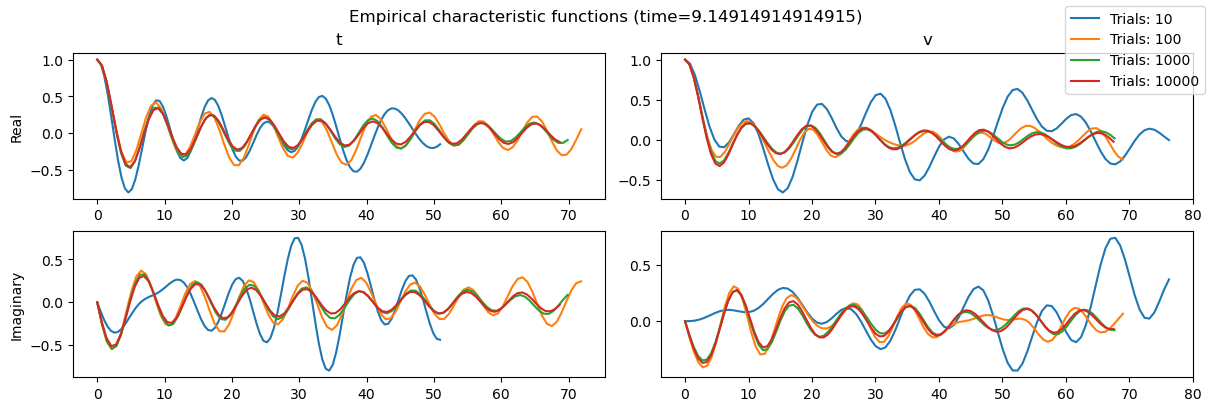

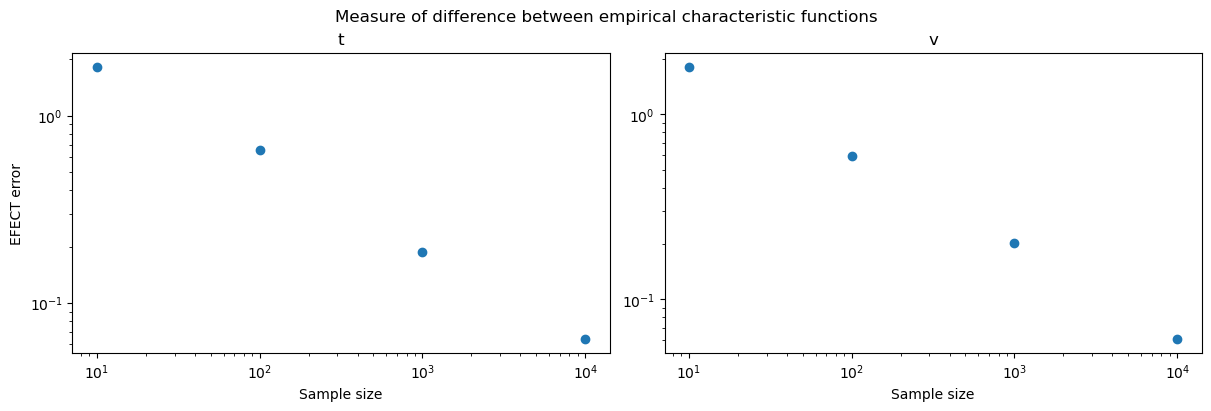

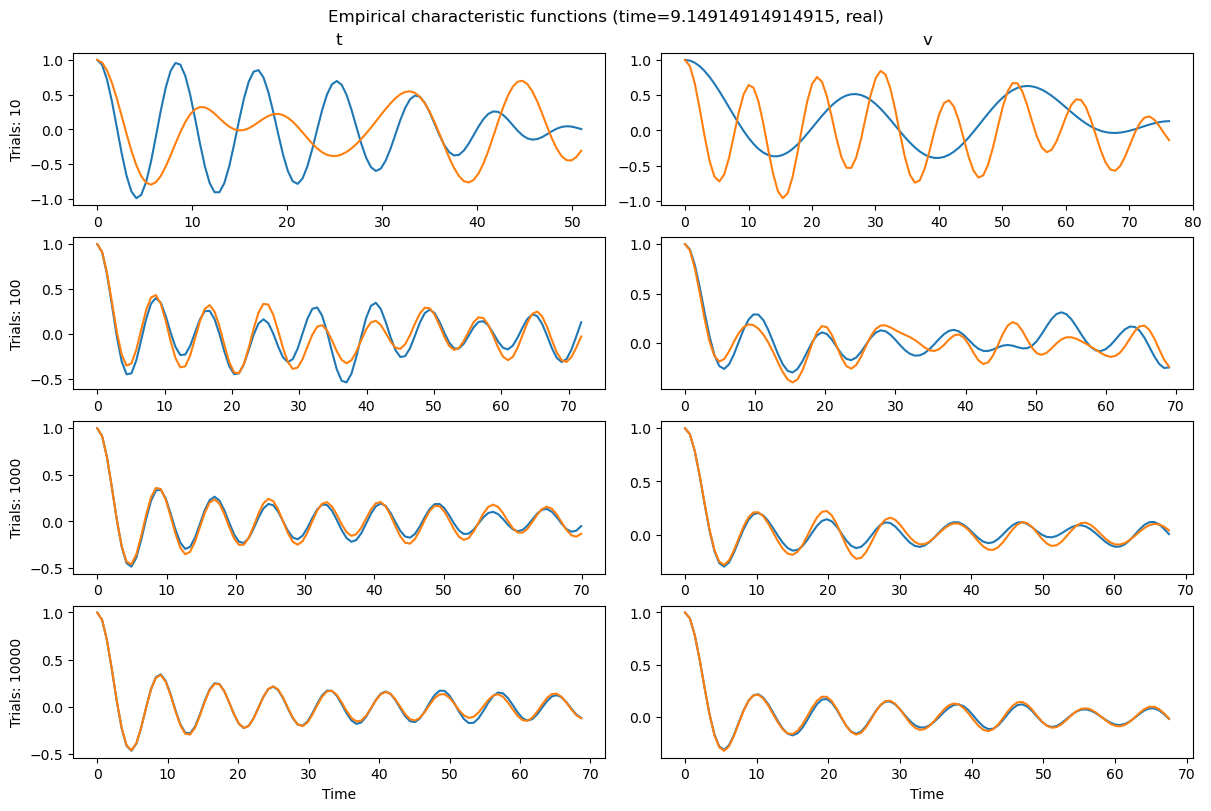

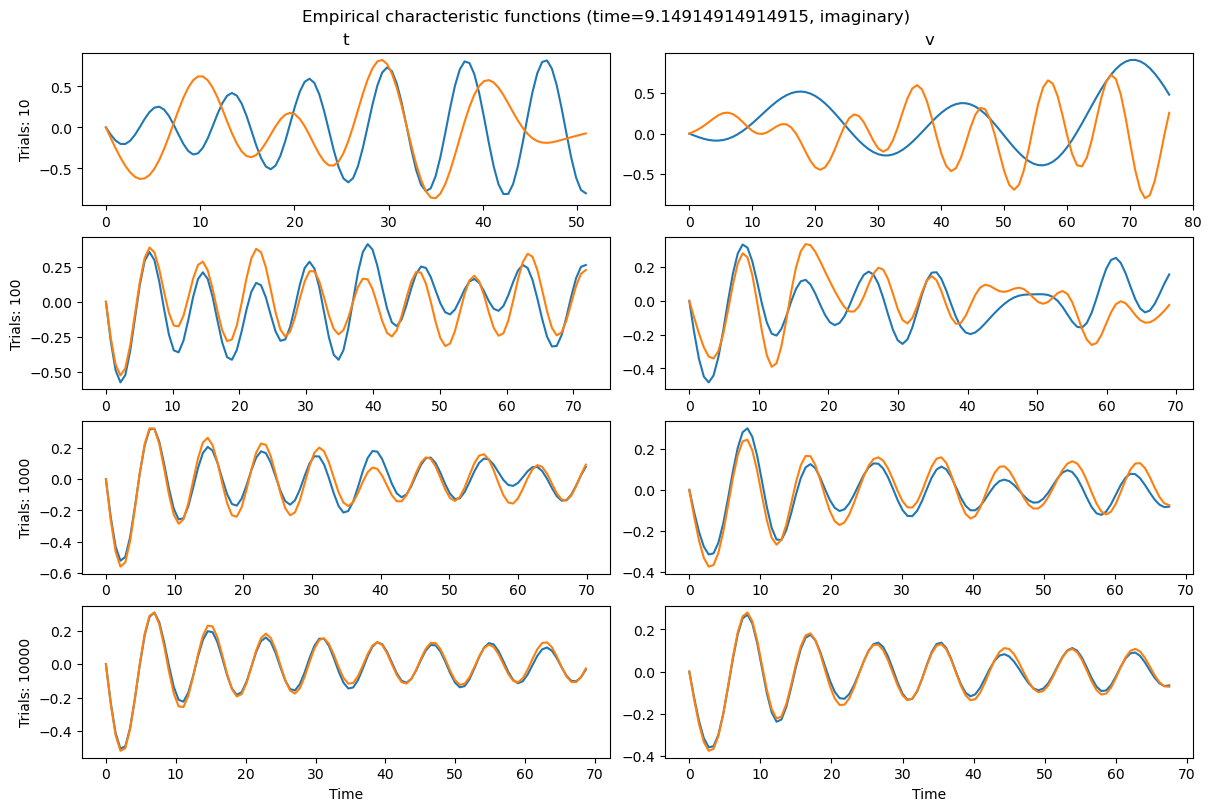

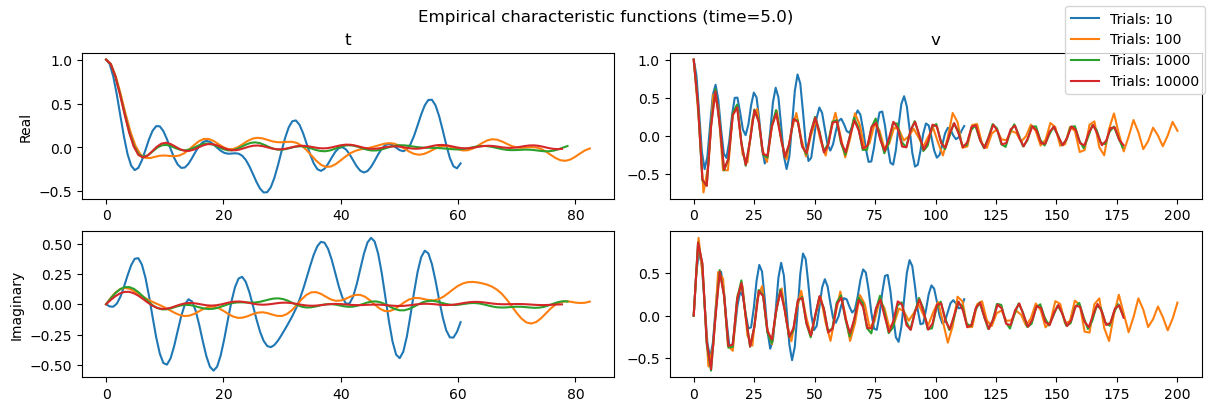

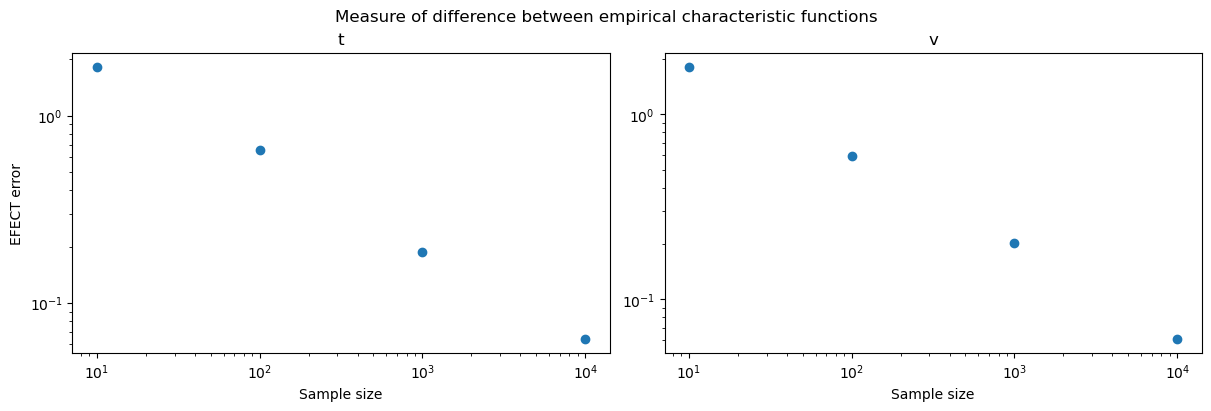

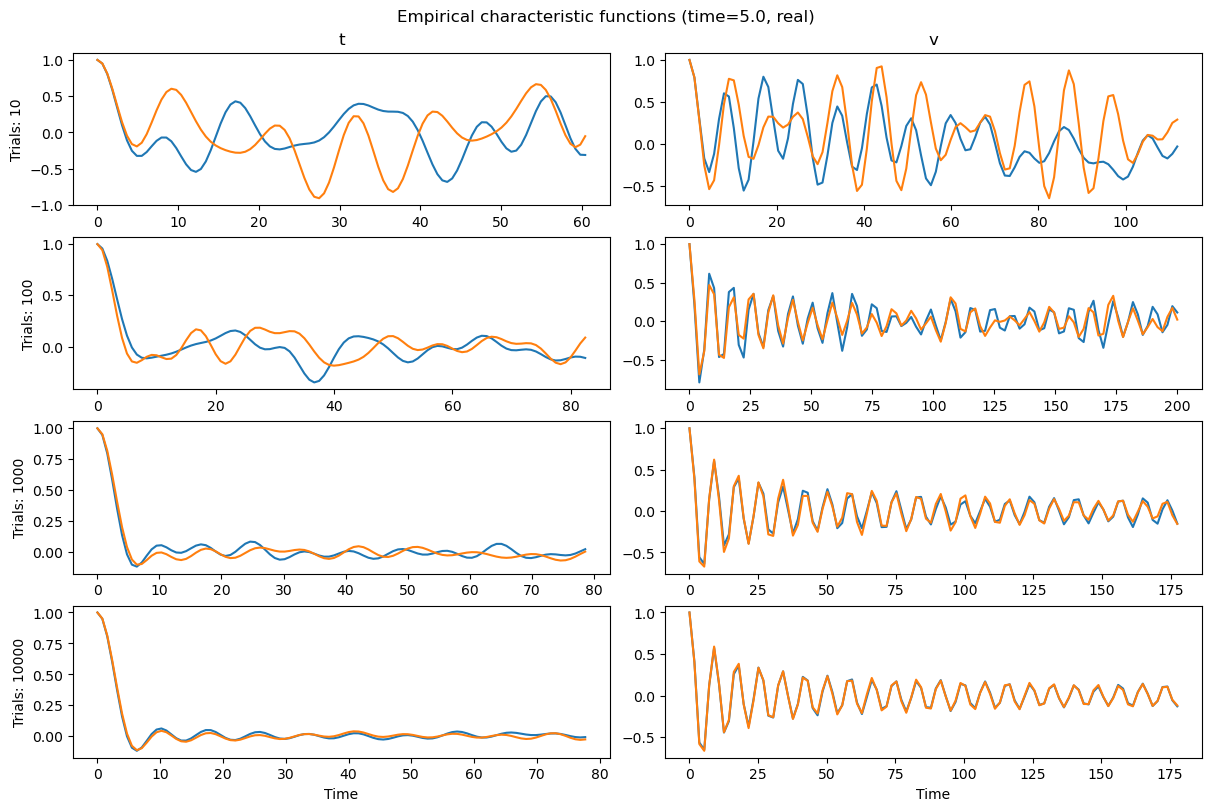

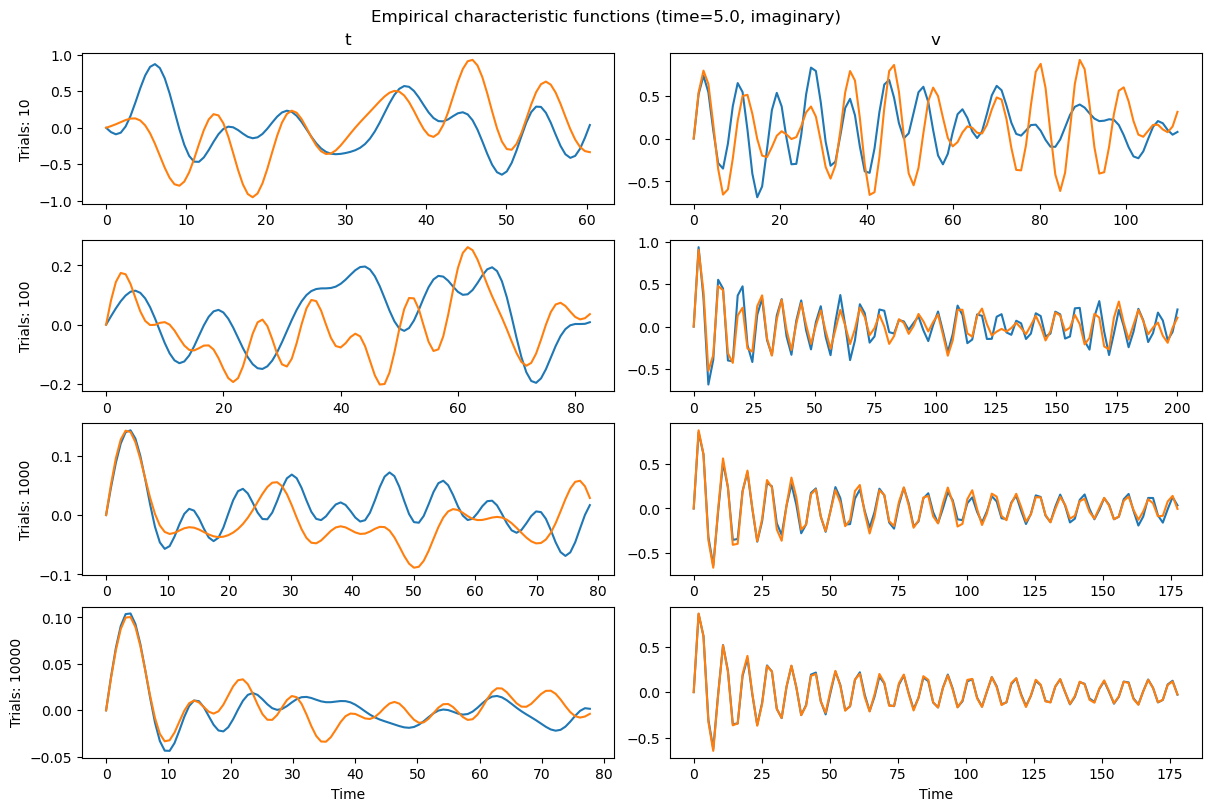

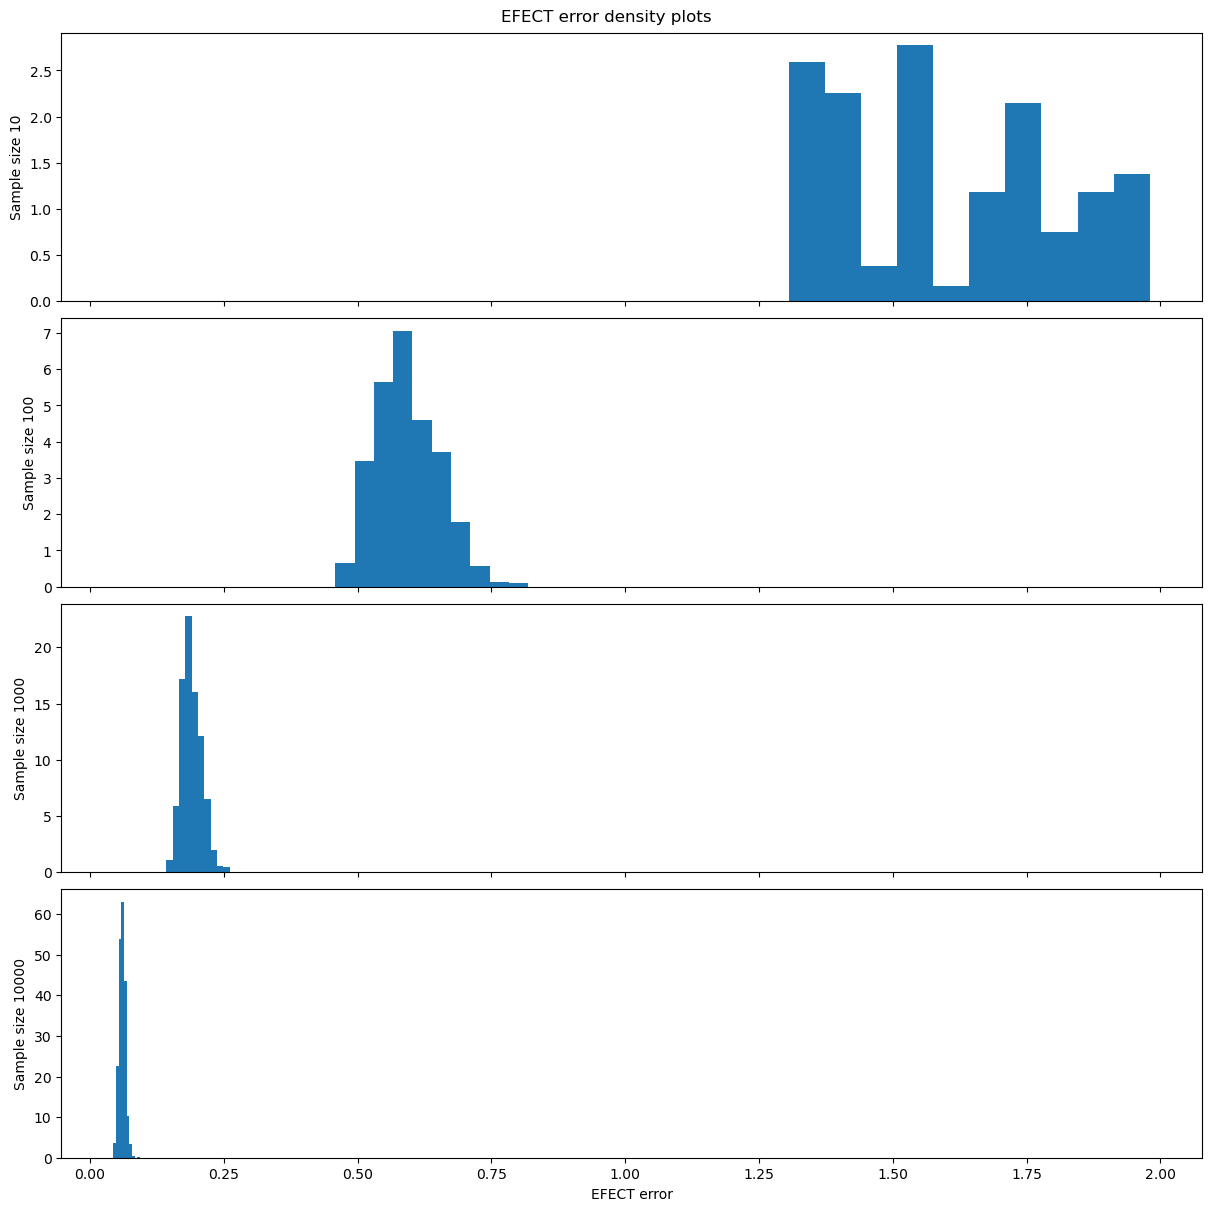

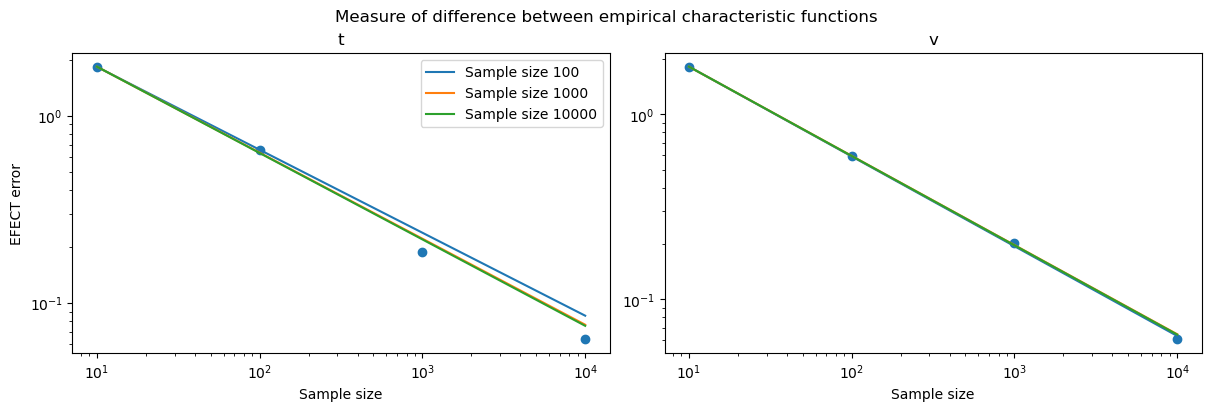

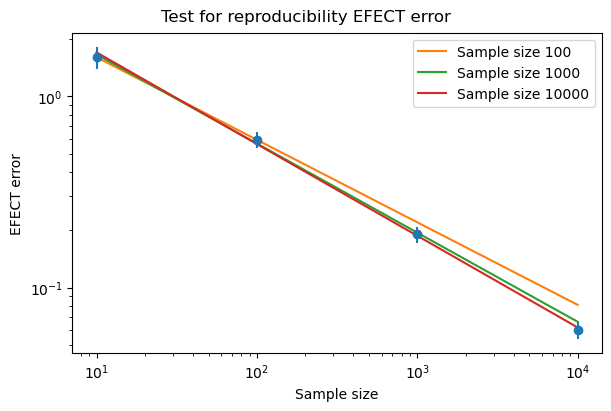

In [4]:
# Runtime: ~26 minutes (M1 max)
test = Test(model=model_nlpendulum({'a': ('norm', (1.0, 0.25))}), **test_kwargs)
do_test(test)
do_fits(test)